# UK Traffic and Accident Data Analysis (2000–2016)

This notebook presents an analysis of traffic volume and accident statistics across the United Kingdom. The goal is to uncover historical trends and build predictive models for traffic conditions using machine learning. Two distinct datasets are utilized for a comprehensive examination:

---

## Dataset 1: accidents_2012_to_2014.csv
This dataset contains information on vehicle counts by year and region. The workflow includes initial data exploration (`info()`, `describe()`), data cleaning (handling missing values and outliers), and several key analyses:
- Total Number of Vehicles by Year (Trend Analysis)
- Average Traffic Volume by Region
- Vehicle Count Distribution by Road Category
- Most Common Estimation Methods Used
- Top 10 Traffic Points with Highest Total Vehicle Counts
- Time Series Analysis by Vehicle Type (2000–2016)

---

## Dataset 2: ukTrafficAADF.csv
The second dataset provides yearly data on traffic accidents. The analyses performed include:
- Total Number of Accidents by Year and Trend Analysis
- Distribution of Accidents by Region (Local Authority Level)
- Accident Timing Analysis (Hourly, Daily, and Seasonal Distributions)

---

## Machine Learning Applications
Following exploratory data analysis, two machine learning models are developed:
1. **Traffic Density Estimation (Classification):**  
   Traffic density is categorized into “Low,” “Medium,” and “High” classes and predicted using a classification algorithm.

2. **Linear Regression for Vehicle Count:**  
   A linear regression model is trained to predict total vehicle counts, with model performance evaluated through RMSE and R² scores.

---

This notebook aims to provide insights into past traffic patterns and develop models to forecast future traffic scenarios.


In [52]:
import pandas as pd

df=pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv')

print(df.columns)
print(df.head())


Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon'],
      dtype='object')
   AADFYear    CP Estimation_method Estimation_method_detailed  \
0      2000  6007           Counted               Manual count   
1      2000  6009           Counted               Manual count   
2      2000  6035           Counted               Manual count   
3      2000  6054           Counted               Manual count   
4      2000  6055           Counted               Manual count   

                     Region LocalAuthority  Road RoadCategory  Ea

In [53]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

In [54]:
print(df.describe())

            AADFYear             CP        Easting      Northing  \
count  275385.000000  275385.000000  275385.000000  2.753850e+05   
mean     2007.967907   47277.490437  425675.250780  3.561826e+05   
std         4.862875   27004.889605   98687.570954  1.869923e+05   
min      2000.000000      60.000000   69987.000000  7.625000e+04   
25%      2004.000000   26218.000000  352970.000000  1.921200e+05   
50%      2008.000000   47252.000000  430000.000000  3.240000e+05   
75%      2012.000000   74392.000000  510600.000000  4.296000e+05   
max      2016.000000   99967.000000  655040.000000  1.205400e+06   

       LinkLength_km  LinkLength_miles    PedalCycles    Motorcycles  \
count  275385.000000     275385.000000  275385.000000  275385.000000   
mean        2.757116          1.712899     123.314654     222.099297   
std         3.815569          2.371086     421.440798     420.874069   
min         0.070000          0.040000       0.000000       0.000000   
25%         0.600000       

In [55]:
df.isnull().sum()

AADFYear                          0
CP                                0
Estimation_method             37573
Estimation_method_detailed    37573
Region                            0
LocalAuthority                    0
Road                              0
RoadCategory                      0
Easting                           0
Northing                          0
StartJunction                   256
EndJunction                     238
LinkLength_km                     0
LinkLength_miles                  0
PedalCycles                       0
Motorcycles                       0
CarsTaxis                         0
BusesCoaches                      0
LightGoodsVehicles                0
V2AxleRigidHGV                    0
V3AxleRigidHGV                    0
V4or5AxleRigidHGV                 0
V3or4AxleArticHGV                 0
V5AxleArticHGV                    0
V6orMoreAxleArticHGV              0
AllHGVs                           0
AllMotorVehicles                  0
Lat                         

## Data Cleaning

In [56]:
df['Estimation_method'] = df['Estimation_method'].fillna('Unknown')
df['Estimation_method_detailed'] = df['Estimation_method_detailed'].fillna('Unknown')
df.dropna(subset=['StartJunction', 'EndJunction'], inplace=True)
df.reset_index(drop=True, inplace=True)


## Total Number of Motor Vehicles by Year (Trend Analysis)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


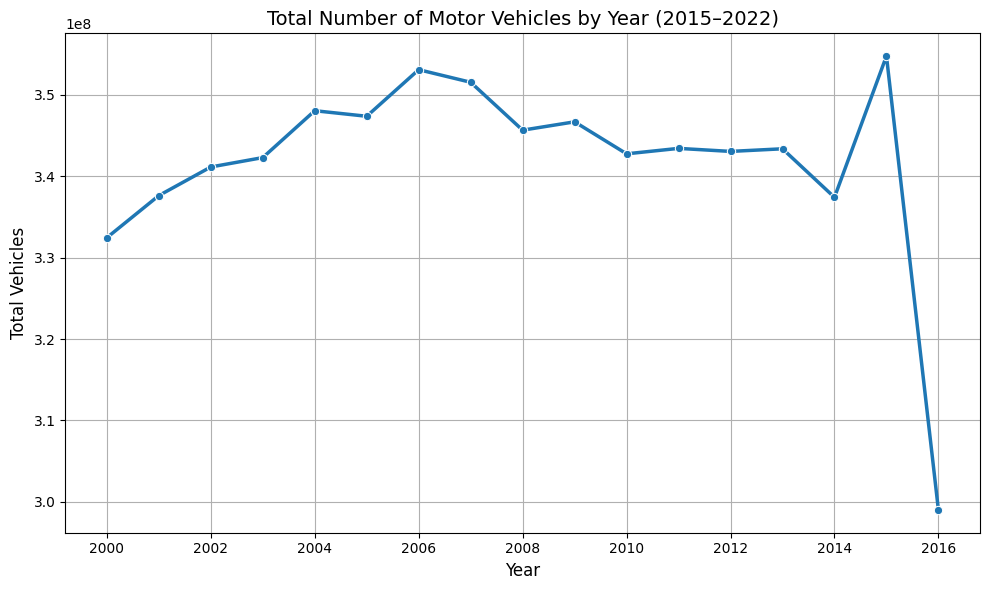

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by year and calculate the total number of vehicles for each year
yearly_total_vehicles = df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index()

# Plot the trend of total vehicles over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_total_vehicles, x='AADFYear', y='AllMotorVehicles', marker='o', linewidth=2.5)
plt.title('Total Number of Motor Vehicles by Year (2015–2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Vehicles', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Average Traffic Volume by Region

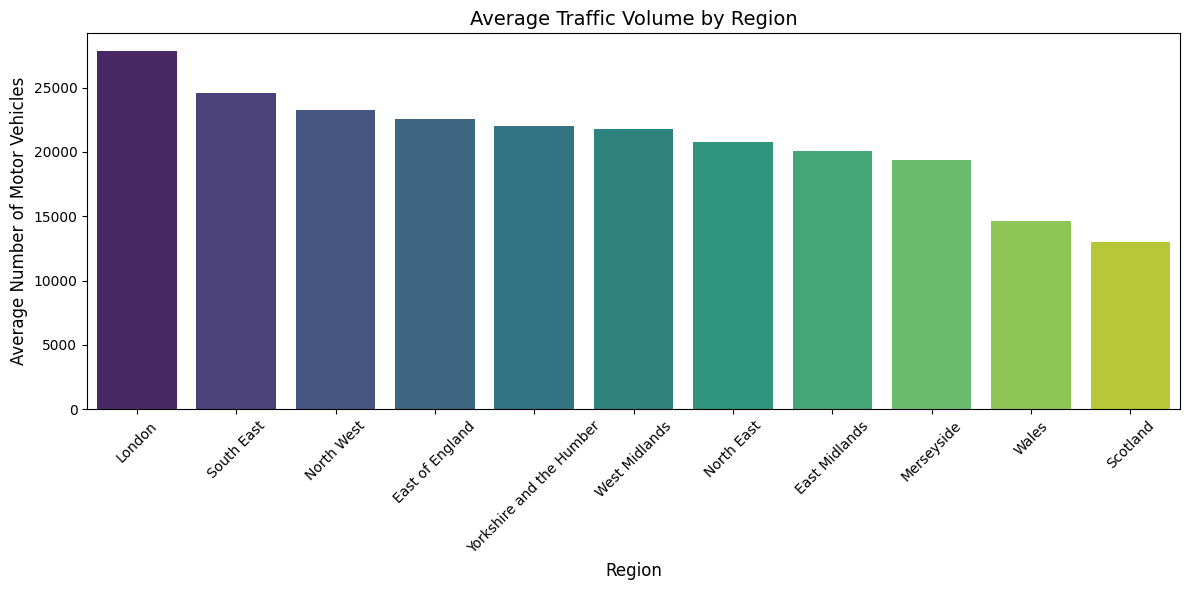

In [58]:
# Group data by Region and calculate average number of vehicles
avg_traffic_by_region = df.groupby('Region')['AllMotorVehicles'].mean().reset_index()

# Sort values for better visualization
avg_traffic_by_region = avg_traffic_by_region.sort_values(by='AllMotorVehicles', ascending=False)

# Plot a bar chart for average traffic volume per region
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_traffic_by_region, x='Region', y='AllMotorVehicles', palette='viridis')
plt.title('Average Traffic Volume by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Number of Motor Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Vehicle Count Distribution by Road Category

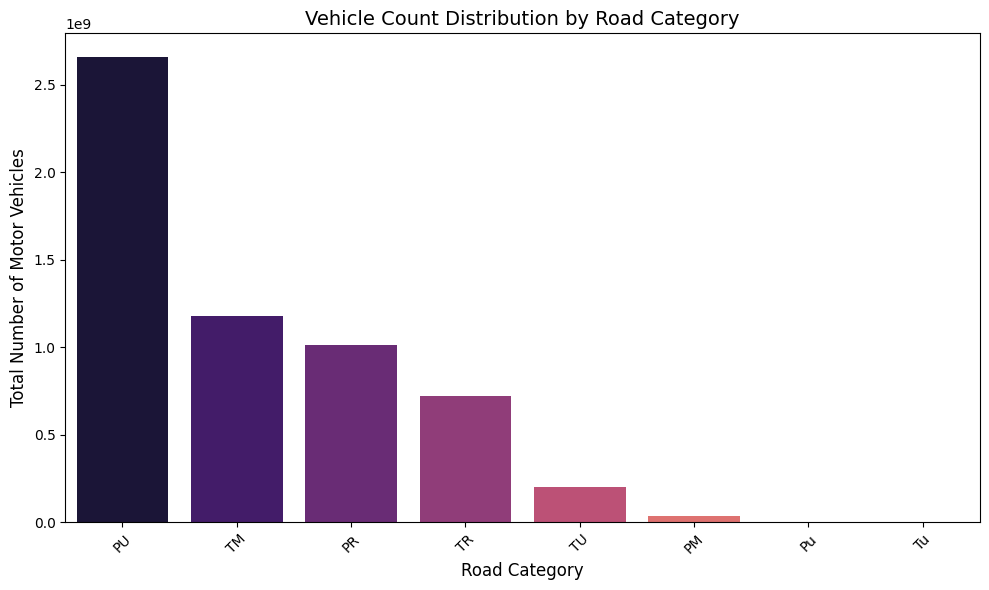

In [59]:
# Group by RoadCategory and sum the number of vehicles
vehicle_count_by_road = df.groupby('RoadCategory')['AllMotorVehicles'].sum().reset_index()

# Sort the values for better visualization
vehicle_count_by_road = vehicle_count_by_road.sort_values(by='AllMotorVehicles', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=vehicle_count_by_road, x='RoadCategory', y='AllMotorVehicles', palette='magma')
plt.title('Vehicle Count Distribution by Road Category', fontsize=14)
plt.xlabel('Road Category', fontsize=12)
plt.ylabel('Total Number of Motor Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Most Common Estimation Methods Used

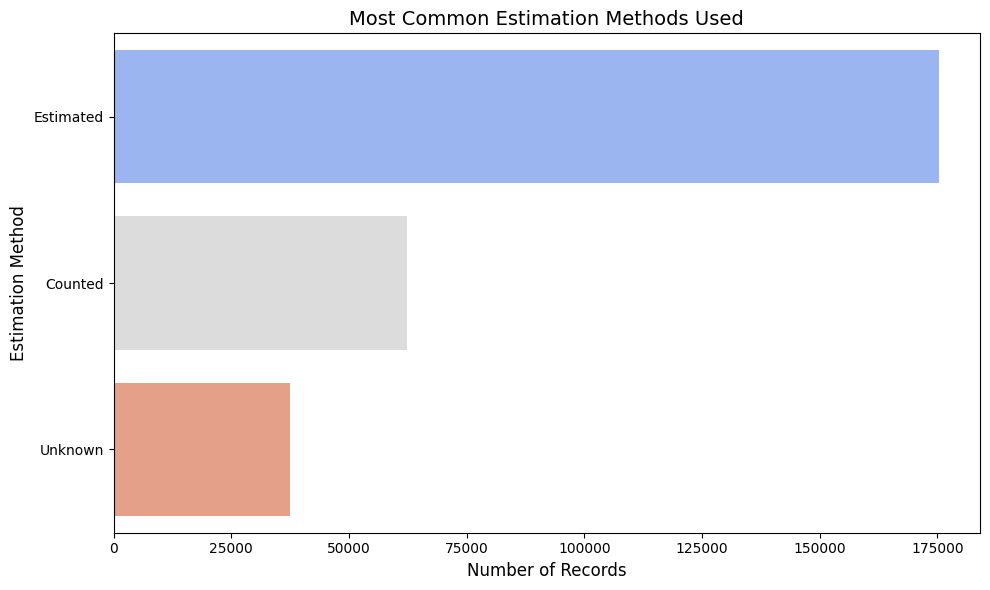

In [60]:
# Count the frequency of each estimation method
estimation_counts = df['Estimation_method'].value_counts().reset_index()
estimation_counts.columns = ['Estimation_method', 'Count']

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=estimation_counts, y='Estimation_method', x='Count', palette='coolwarm')
plt.title('Most Common Estimation Methods Used', fontsize=14)
plt.xlabel('Number of Records', fontsize=12)
plt.ylabel('Estimation Method', fontsize=12)
plt.tight_layout()
plt.show()

## Top 10 Count Points with Highest Total Vehicle Count

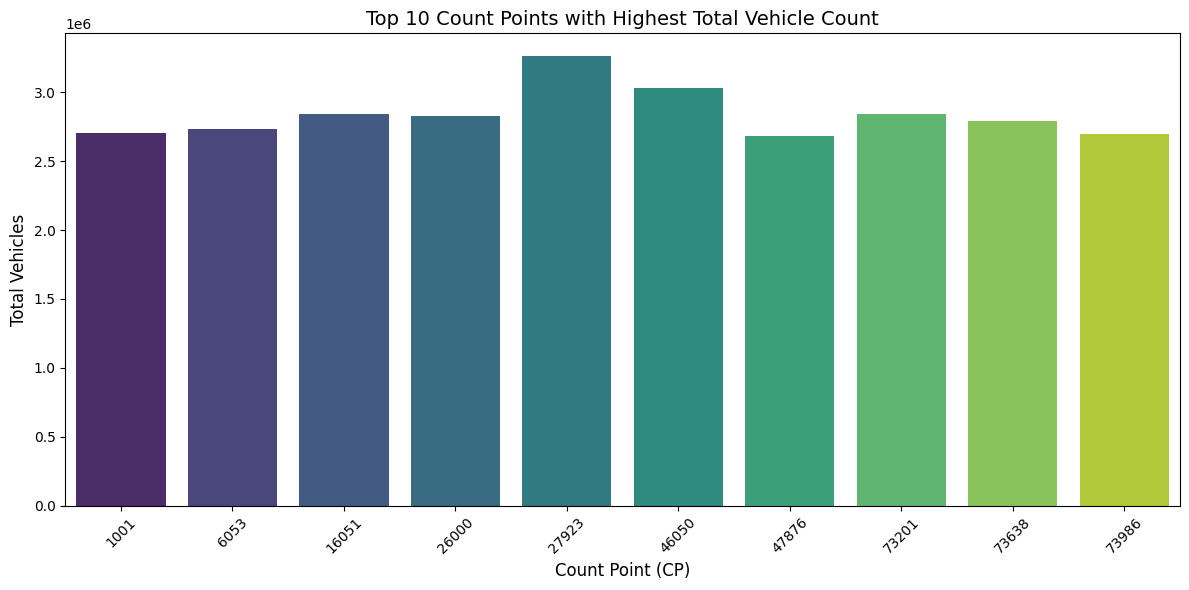

In [61]:
# List of vehicle columns (adjust if needed)
vehicle_cols = [
    'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches',
    'LightGoodsVehicles', 'V2AxleRigidHGV', 'V3AxleRigidHGV',
    'V4or5AxleRigidHGV', 'V3or4AxleArticHGV', 'V5AxleArticHGV', 'V6orMoreAxleArticHGV'
]

# Sum all vehicle types for each record
df['TotalVehicles'] = df[vehicle_cols].sum(axis=1)

# Group by Count Point and sum the totals
cp_totals = df.groupby('CP')['TotalVehicles'].sum().reset_index()

# Get top 10 busiest count points
top_10_cp = cp_totals.sort_values(by='TotalVehicles', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cp, x='CP', y='TotalVehicles', palette='viridis')
plt.title('Top 10 Count Points with Highest Total Vehicle Count', fontsize=14)
plt.xlabel('Count Point (CP)', fontsize=12)
plt.ylabel('Total Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time Series Trend of Vehicle Counts (2000–2016) with Vehicle Type Breakdown

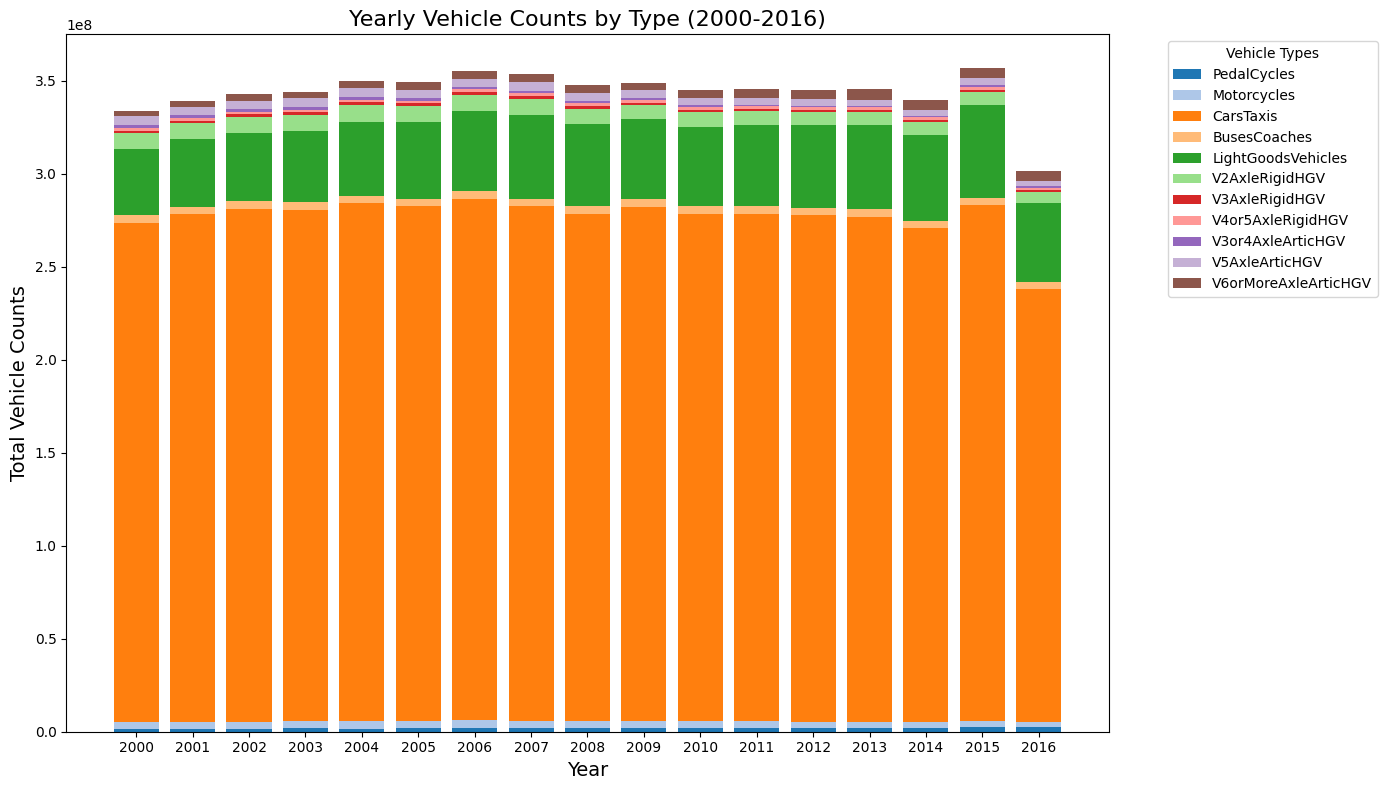

In [62]:
# Filter data for years 2000 to 2016
df_time = df[(df['AADFYear'] >= 2000) & (df['AADFYear'] <= 2016)]

# Vehicle columns to analyze
vehicle_cols = [
    'PedalCycles', 'Motorcycles', 'CarsTaxis', 'BusesCoaches',
    'LightGoodsVehicles', 'V2AxleRigidHGV', 'V3AxleRigidHGV',
    'V4or5AxleRigidHGV', 'V3or4AxleArticHGV', 'V5AxleArticHGV', 'V6orMoreAxleArticHGV'
]

# Group by year and sum each vehicle type
yearly_vehicle_counts = df_time.groupby('AADFYear')[vehicle_cols].sum().reset_index()

# Plot stacked bar chart for vehicle counts by year
plt.figure(figsize=(14, 8))

# Use seaborn color palette
colors = sns.color_palette('tab20', n_colors=len(vehicle_cols))

# Plot stacked bars
bottom = pd.Series([0]*len(yearly_vehicle_counts))
for i, col in enumerate(vehicle_cols):
    plt.bar(yearly_vehicle_counts['AADFYear'], yearly_vehicle_counts[col], bottom=bottom, color=colors[i], label=col)
    bottom += yearly_vehicle_counts[col]

plt.title('Yearly Vehicle Counts by Type (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Vehicle Counts', fontsize=14)
plt.legend(title='Vehicle Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(yearly_vehicle_counts['AADFYear'])
plt.tight_layout()
plt.show()

## Analysis For Accidents (2012-2014)

In [63]:
df_accident=pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')
df_accident.head()

/tmp/ipykernel_36/294758708.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accident=pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


In [64]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [71]:
df_accident.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,DateTime,Hour,Month
count,464697.000000,4.646970e+05,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697,464697.000000,...,464697.000000,464697.000000,0.0,464697.000000,464697.000000,464697.000000,464697.000000,464684,464684.000000,464684.000000
mean,443834.284222,2.986258e+05,-1.375156,52.575498,28.504051,2.833461,1.828086,1.334420,2013-06-09 18:52:27.800825088,4.108740,...,1012.728324,38.229793,NaN,2.786293,380.952317,1.337426,2012.928140,2013-06-10 08:53:09.225366272,13.522951,6.662127
min,65510.000000,1.029000e+04,-7.509162,49.912941,1.000000,1.000000,1.000000,1.000000,2012-01-01 00:00:00,1.000000,...,0.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2012.000000,2012-01-01 00:04:00,0.000000,1.000000
25%,379059.000000,1.777100e+05,-2.315799,51.484841,6.000000,3.000000,1.000000,1.000000,2012-08-30 00:00:00,2.000000,...,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2012.000000,2012-08-30 10:54:00,10.000000,4.000000
50%,445539.000000,2.606800e+05,-1.323374,52.232169,22.000000,3.000000,2.000000,1.000000,2013-06-03 00:00:00,4.000000,...,147.000000,30.000000,NaN,3.000000,0.000000,1.000000,2013.000000,2013-06-03 15:58:30,14.000000,7.000000
75%,525350.000000,3.989590e+05,-0.192935,53.485973,45.000000,3.000000,2.000000,1.000000,2014-03-19 00:00:00,6.000000,...,759.000000,40.000000,NaN,6.000000,0.000000,2.000000,2014.000000,2014-03-19 18:35:00,17.000000,10.000000
max,655370.000000,1.190858e+06,1.759382,60.597984,98.000000,3.000000,67.000000,93.000000,2014-12-31 00:00:00,7.000000,...,9999.000000,70.000000,NaN,6.000000,9999.000000,2.000000,2014.000000,2014-12-31 23:58:00,23.000000,12.000000
std,94098.865933,1.594701e+05,1.382137,1.436370,25.334899,0.402029,0.708703,0.821047,NaN,1.916429,...,1810.523701,13.800546,NaN,3.187084,1289.786824,0.472832,0.834536,NaN,5.065487,3.433106


## Total number of accidents by year and trend

/tmp/ipykernel_36/2199910773.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_accident['Date'] = pd.to_datetime(df_accident['Date'], errors='coerce')


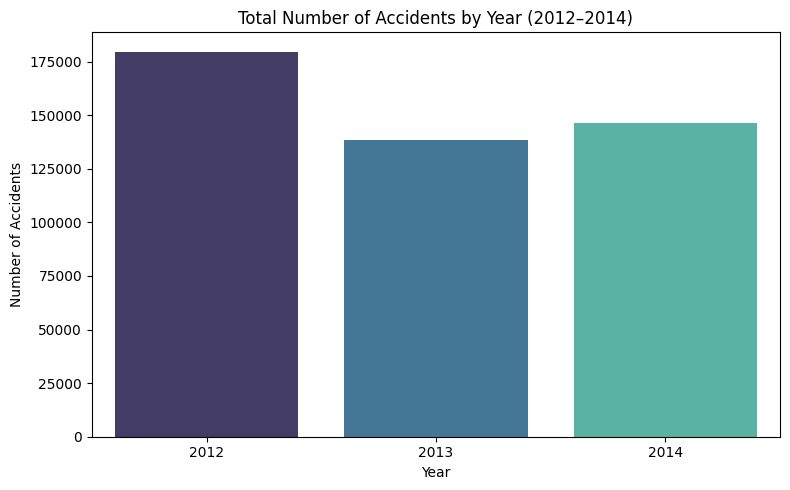

In [66]:
# Convert the 'Date' column to datetime format
df_accident['Date'] = pd.to_datetime(df_accident['Date'], errors='coerce')

# Extract the year from the 'Date' column
df_accident['Year'] = df_accident['Date'].dt.year

# Group by year and count the number of accidents
accidents_per_year = df_accident.groupby('Year').size()

# Plot: Total number of accidents per year
plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette="mako")

plt.title("Total Number of Accidents by Year (2012–2014)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

## Distribution of Accidents by Region (Local Authority)

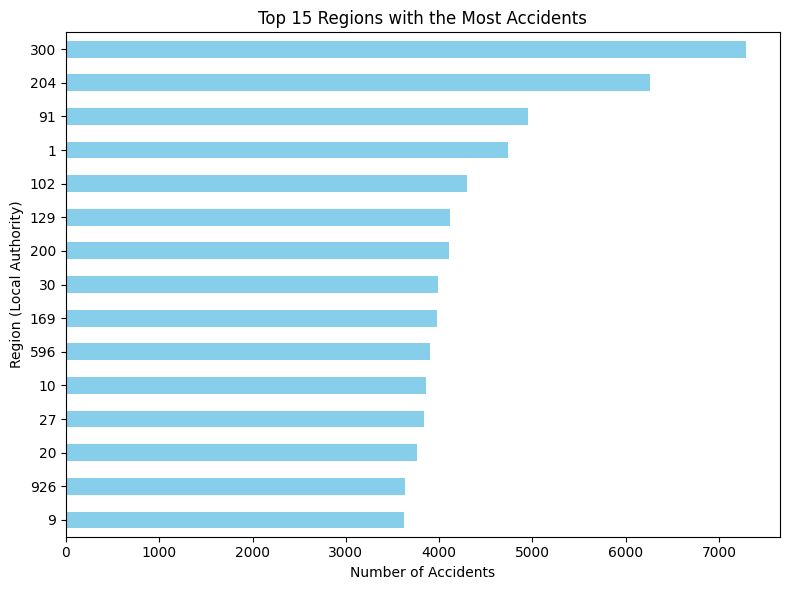

In [67]:
# Count the number of accidents by Local Authority and select the top 15
local_authority_counts = df_accident['Local_Authority_(District)'].value_counts().head(15)

# Plotting
plt.figure(figsize=(8, 6))
local_authority_counts.plot(kind='barh', color='skyblue')
plt.title('Top 15 Regions with the Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Region (Local Authority)')
plt.gca().invert_yaxis()  # Show the highest values at the top
plt.tight_layout()
plt.show()


## Accident Time Analysis (Hourly, Daily, Seasonal Distributions)

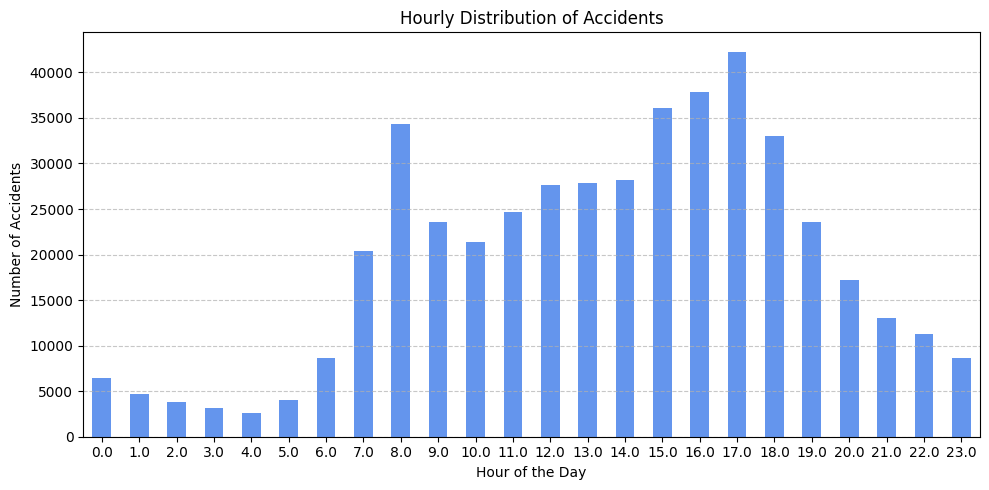

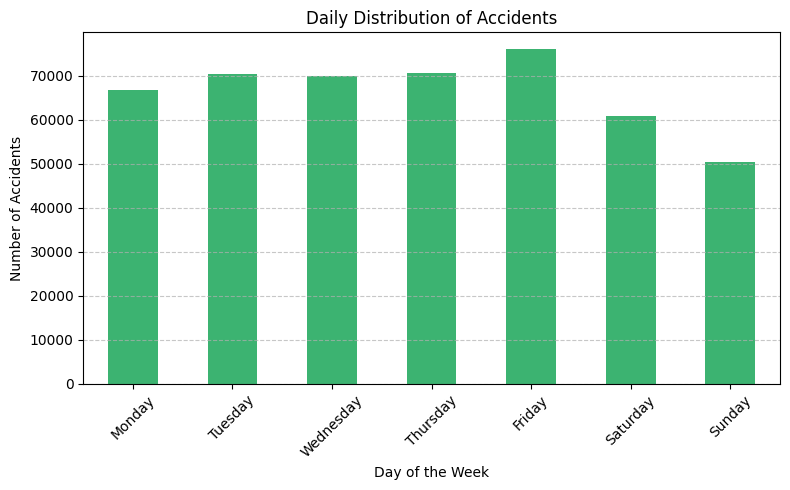

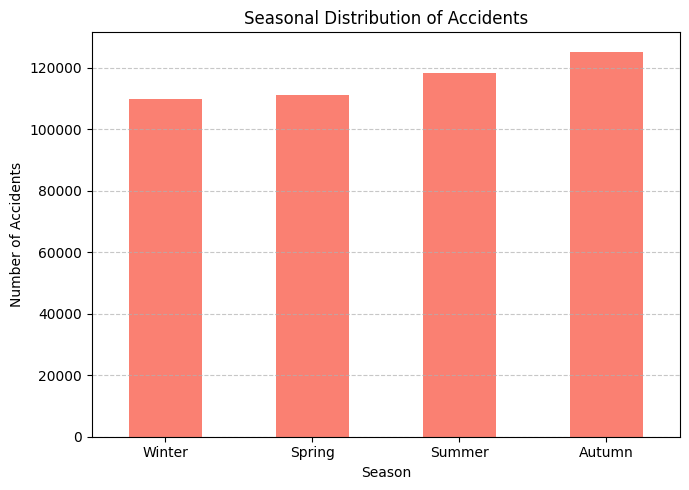

In [68]:
# Combine 'Date' and 'Time' columns into a single datetime column
df_accident['DateTime'] = pd.to_datetime(df_accident['Date'].astype(str) + ' ' + df_accident['Time'].astype(str), errors='coerce')

# Extract hour from datetime
df_accident['Hour'] = df_accident['DateTime'].dt.hour

# Count accidents per hour
hourly_counts = df_accident['Hour'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Extract day of week
df_accident['DayOfWeek'] = df_accident['DateTime'].dt.day_name()

# Define weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df_accident['DayOfWeek'].value_counts().reindex(day_order)


plt.figure(figsize=(8, 5))
daily_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Daily Distribution of Accidents')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Extract month from date
df_accident['Month'] = df_accident['DateTime'].dt.month

# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

# Apply the function
df_accident['Season'] = df_accident['Month'].apply(get_season)

# Count by season
season_counts = df_accident['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])


plt.figure(figsize=(7, 5))
season_counts.plot(kind='bar', color='salmon')
plt.title('Seasonal Distribution of Accidents')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Traffic Density Estimation(Low/Medium/High)

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.49      0.43     18762
         Low       0.57      0.34      0.42     18217
      Medium       0.37      0.40      0.38     18040

    accuracy                           0.41     55019
   macro avg       0.44      0.41      0.41     55019
weighted avg       0.44      0.41      0.41     55019



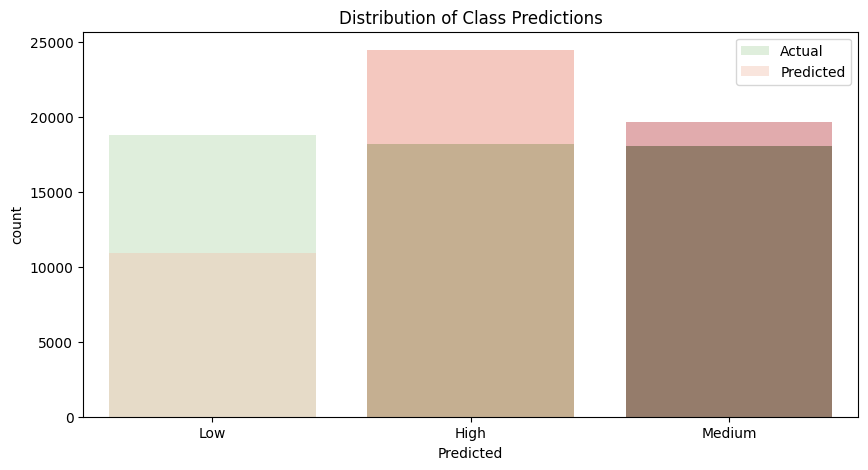

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create traffic density category based on AllMotorVehicles with thresholds (quantiles)
quantiles = df['AllMotorVehicles'].quantile([0.33, 0.66]).values
def categorize_traffic(count):
    if count <= quantiles[0]:
        return 'Low'
    elif count <= quantiles[1]:
        return 'Medium'
    else:
        return 'High'

df['TrafficCategory'] = df['AllMotorVehicles'].apply(categorize_traffic)

# Prepare features and labels
features = ['AADFYear', 'LinkLength_km',]  

X = df[features]
y = df['TrafficCategory']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10,5))
sns.countplot(x='Actual', data=results_df, palette='Greens', alpha=0.6, label='Actual')
sns.countplot(x='Predicted', data=results_df, palette='Reds', alpha=0.4, label='Predicted')
plt.legend()
plt.title("Distribution of Class Predictions")
plt.show()

## Linear Regression Results for Predicting AllMotorVehicles (with RMSE and R² Scores)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target
X_reg = df[features]  # same as classification features
y_reg = df['AllMotorVehicles']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

y_pred_reg = lr.predict(X_test_reg)

print("Linear Regression Results:")
print(f"RMSE: {mean_squared_error(y_test_reg, y_pred_reg, squared=False)}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg)}")


Linear Regression Results:
RMSE: 21193.244649003656
R^2 Score: 0.014200727847187511
